# SALES PREDICTION USING PYTHON <br/>

# Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.<br/>

# In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

IMPORTING RELEVANT LIBRARIES

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

UPLOADING DATASET

In [156]:
df = pd.read_csv("advertising.csv")

In [157]:
df.head() #first 5 records of the dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [158]:
df.shape #dimension of the dataset

(200, 4)

In [159]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


INTERPRETATION: All the 4 features are numerical types.

DATA PREPROCESSING AND VISUALIZATION

In [160]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [161]:
df.isnull().sum() #checking for null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

INTERPRETATION: No null values.

In [162]:
df.describe() #descriptive statistics

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


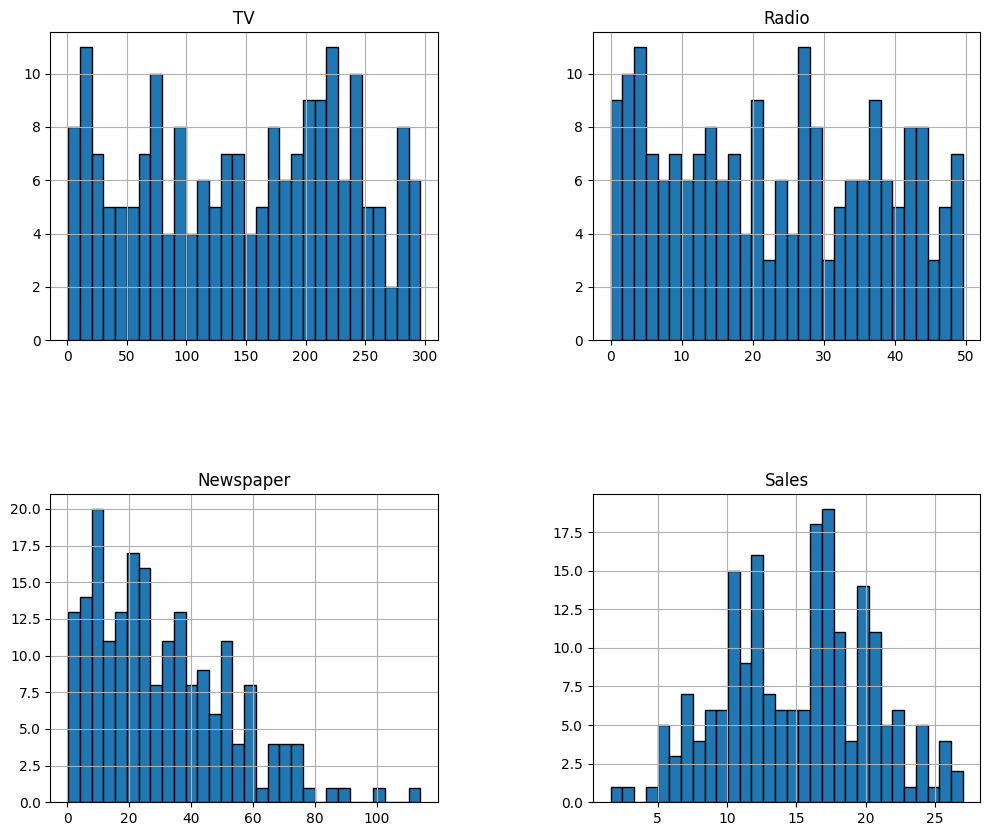

In [163]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

In [164]:
df.duplicated().sum() #checking for duplicates

0

INTERPRETATION: No duplicates found.

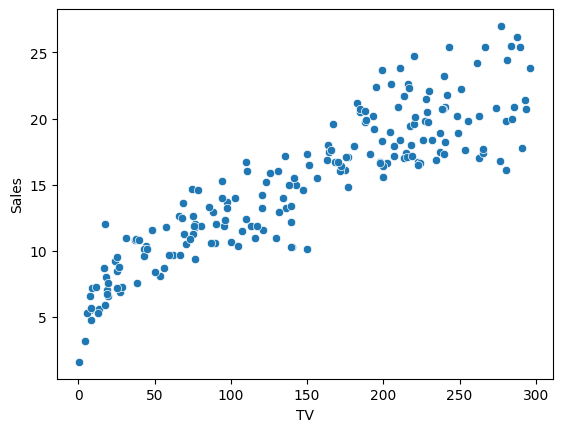

In [165]:
sns.scatterplot(df,x='TV', y='Sales')
plt.show()

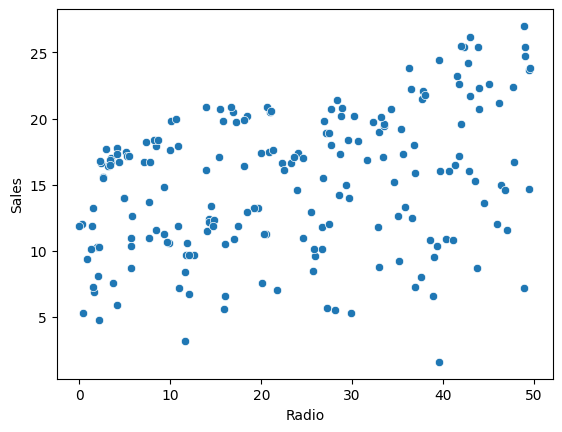

In [166]:
sns.scatterplot(df,x='Radio', y='Sales')
plt.show()

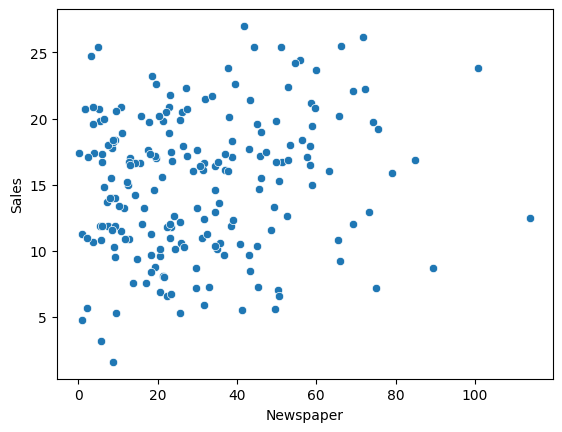

In [167]:
sns.scatterplot(df,x='Newspaper', y='Sales')
plt.show()

<Axes: >

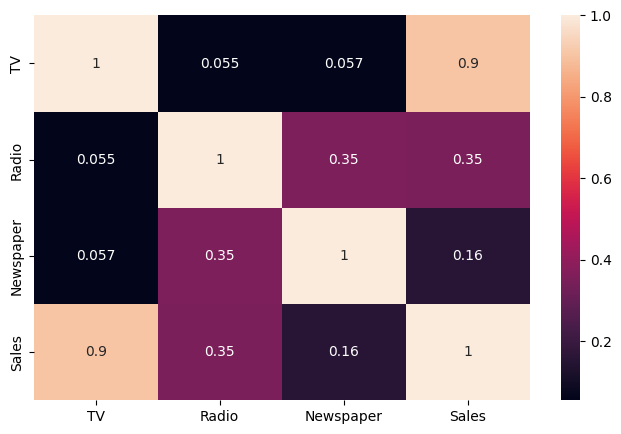

In [168]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(),annot=True)

INTERPRETATION: The feature TV seems to be most correlated with Sales.

MODEL BUILDING : LINEAR REGRESSION

Multiple Linear Regression <br/>
y = B0 + X1B1 + X2B2 + X3B3 <br/>
where, y = Sales <br/>
X1 = TV, X2 = Radio, X3 = Newspaper <br/>
and, B0 is the intercept and B1, B2, B3 are model coefficients wrt X1,X2,X3 resp.

FEATURE ENGINEERING

In [169]:
features = ['TV','Radio','Newspaper']
X= df[features]
y = df['Sales']

TRAIN-TEST SPLIT

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104, test_size=0.20, shuffle=True)

In [171]:
print("Training set size of input fetaures: ",X_train.shape)
print("Training set size of output fetaure: ",y_train.shape)
print()
print("Testing set size of input fetaures: ",X_test.shape)
print("Testing set size of output fetaure: ",y_test.shape)

Training set size of input fetaures:  (160, 3)
Training set size of output fetaure:  (160,)

Testing set size of input fetaures:  (40, 3)
Testing set size of output fetaure:  (40,)


MULTIPLE LINEAR REGRESSION MODEL BUILDING

In [172]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [173]:
y_pred=clf.predict(X_test)

In [174]:
y_pred

array([21.13528505, 21.82025148,  9.58510415,  9.82789585, 16.47576318,
       16.55943106, 10.83523791, 16.97670852, 22.09806534,  6.04868668,
       10.6092423 , 20.97648648, 18.09191181, 23.54915568, 20.92763611,
       18.31874405, 15.04804748,  9.04739245, 11.52863301, 12.46280698,
       11.76468545, 20.94200408, 14.381592  , 17.78206769,  9.82560575,
       15.30514151, 15.5947738 ,  9.79754673, 20.20421605,  8.81940213,
       20.56368211, 10.75768344, 19.56320483, 18.96194527, 21.54353908,
       13.20336679, 18.78729994, 16.25273954, 12.16359588,  8.76358935])

R2 SQUARE VALUE

In [175]:
r2_train = clf.score(X_train, y_train)
r2_test = clf.score(X_test, y_test)

print('R-squared value for the training set: ',r2_train)
print('R-squared value for the testing set: ',r2_test)

R-squared value for the training set:  0.9145665931564282
R-squared value for the testing set:  0.8502840395332153


INTERPRETATION: Since, the value is closer to 1, therefore model is quite efficient.

SIMPLE LINEAR REGRESSION <br/>
y = B0 + XB1 
where, y = Sales <br/>
X = TV and, B0 is the intercept and B1 is the model coefficient wrt X

FEATURE ENGINEERING

In [176]:
X = df[['TV']]
y = df['Sales']

TRAIN-TEST SPLIT

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104, test_size=0.20, shuffle=True)

SIMPLE LINEAR REGRESSION MODEL BUILDING

In [178]:
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [179]:
y_pred=clf.predict(X_test)

In [180]:
y_pred

array([20.10580534, 19.12584635, 10.727762  , 12.3044558 , 14.24247527,
       16.65131302,  7.54152661, 17.34659119, 20.19887408,  8.00687027,
       10.85367852, 20.68611626, 18.54006081, 21.37044517, 18.75357142,
       16.44327703, 13.80450477,  7.10355611,  9.5014446 , 13.48150152,
       11.24237734, 22.62961035, 16.28451273, 19.42695107,  9.41932513,
       14.80088766, 18.00354694, 11.19858029, 18.98350594, 10.68396495,
       22.97998675,  7.99044637, 19.02182836, 18.85758942, 18.60575638,
       13.64574046, 17.96522452, 18.38677113, 13.68953751, 11.24785197])

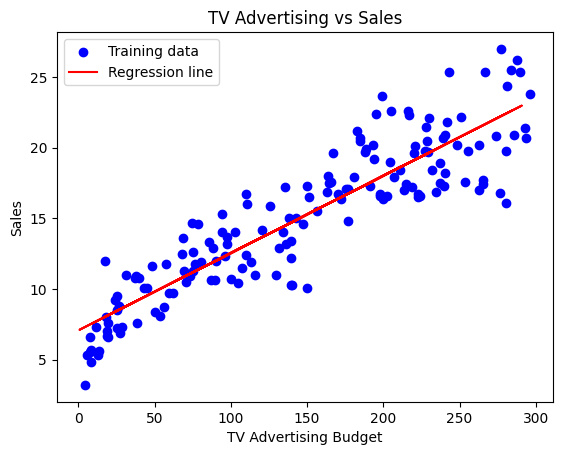

In [181]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()


R2 SQUARE VALUE

In [182]:
r2_train = clf.score(X_train, y_train)
r2_test = clf.score(X_test, y_test)

print('R-squared value for the training set: ',r2_train)
print('R-squared value for the testing set: ',r2_test)


R-squared value for the training set:  0.8114906992972554
R-squared value for the testing set:  0.8136765045169048


INTERPRETATION: Since value is closer to 1, this model is also good, but MLR is better as it has a better value.